In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [2]:
df = pd.read_csv('features.csv')

## EDA

In [3]:
df.head()

,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Partials,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chroma_StFt,Tonnetz,Sex,Age,Species,Call
0,706,1,0.083313,0.015951,848.0,263.00,2,-3.270038,1526.165771,0.101744,18.307605,0.734437,-0.006876,NaN,A,A. jubatus,growl
1,3456,4,0.296424,0.035485,3645.5,452.25,21,-2.419156,1377.502653,0.625990,18.523777,0.682254,-0.011424,NaN,A,A. jubatus,NaN
2,2984,5,0.171860,0.022913,2181.8,308.00,8,-2.863807,1011.861165,0.214492,18.676903,0.664394,0.005879,NaN,A,A. jubatus,growl
3,3108,5,0.243933,0.023587,3437.0,314.00,11,-3.096756,1207.803345,0.279397,18.298732,0.731459,0.005906,NaN,A,A. jubatus,NaN
4,1919,3,0.194653,0.029304,2189.0,331.00,5,-2.780607,942.326097,0.370894,18.787422,0.632496,-0.000778,NaN,A,A. jubatus,growl


In [4]:
df.shape

(463, 17)

In [5]:
df.columns.values 

array(['Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp', 'Freq_range',
       'Pulses_per_Sec', 'Partials', 'MFCC', 'Spectral Rolloff',
       'Melspectrogram', 'Spectral Contrast', 'Chroma_StFt', 'Tonnetz',
       'Sex', 'Age', 'Species', 'Call'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zero_Crossings     463 non-null    int64  
 1   Duration           463 non-null    int64  
 2   Amp_range          463 non-null    float64
 3   Avg_amp            463 non-null    float64
 4   Freq_range         463 non-null    float64
 5   Pulses_per_Sec     463 non-null    float64
 6   Partials           463 non-null    int64  
 7   MFCC               463 non-null    float64
 8   Spectral Rolloff   463 non-null    float64
 9   Melspectrogram     463 non-null    float64
 10  Spectral Contrast  463 non-null    float64
 11  Chroma_StFt        463 non-null    float64
 12  Tonnetz            463 non-null    float64
 13  Sex                342 non-null    object 
 14  Age                375 non-null    object 
 15  Species            463 non-null    object 
 16  Call               450 non

In [7]:
df.describe(include='all')

,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Partials,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chroma_StFt,Tonnetz,Sex,Age,Species,Call
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,342,375,463,450
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,6,9,28
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,Adult,Ocelot,growl
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187,262,113,208
mean,7744.727862,4.198704,0.172027,0.019021,4463.588180,650.403993,7.734341,-5.664082,3793.250625,0.304937,18.261619,0.712314,0.005680,NaN,NaN,NaN,NaN
std,9319.483002,3.644874,0.149925,0.017870,3070.432716,668.148068,10.174912,3.117995,2118.052241,0.533002,1.148588,0.084442,0.017060,NaN,NaN,NaN,NaN
min,281.000000,1.000000,0.003207,0.000551,1.000000,0.000000,0.000000,-11.147088,472.488169,0.000100,15.759882,0.283377,-0.042874,NaN,NaN,NaN,NaN
25%,2502.500000,2.000000,0.056398,0.005321,2199.375000,230.166667,1.000000,-8.842759,1618.851365,0.010136,17.509332,0.658461,-0.004810,NaN,NaN,NaN,NaN
50%,4505.000000,3.000000,0.141724,0.013124,3777.000000,410.400000,4.000000,-5.516306,3825.113652,0.080529,18.188795,0.729124,0.004978,NaN,NaN,NaN,NaN
75%,9680.000000,5.000000,0.239012,0.027823,6807.460317,774.500000,12.000000,-2.724109,5684.917406,0.342521,18.815942,0.774701,0.012813,NaN,NaN,NaN,NaN


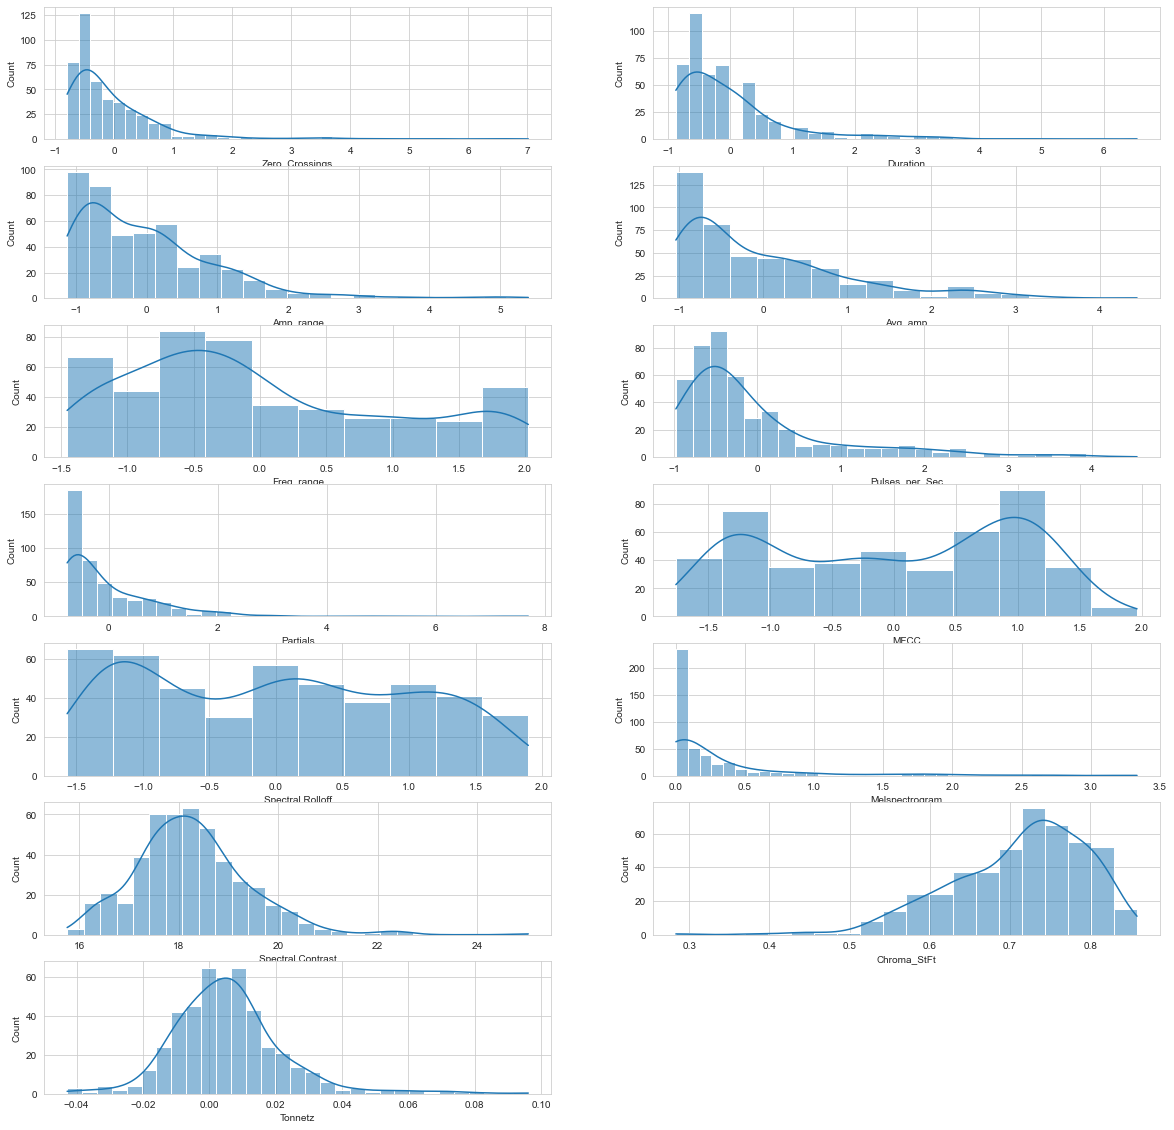

In [27]:
#Histogram to check distribution and skewness
l= ['Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp', 'Freq_range',
       'Pulses_per_Sec', 'Partials', 'MFCC', 'Spectral Rolloff',
       'Melspectrogram', 'Spectral Contrast', 'Chroma_StFt', 'Tonnetz']

plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(7,2,i+1)
    sns.histplot(df[l[i]],kde=True) 
plt.show()

C:\Users\exant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\exant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\exant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\exant\anaconda3\lib\si

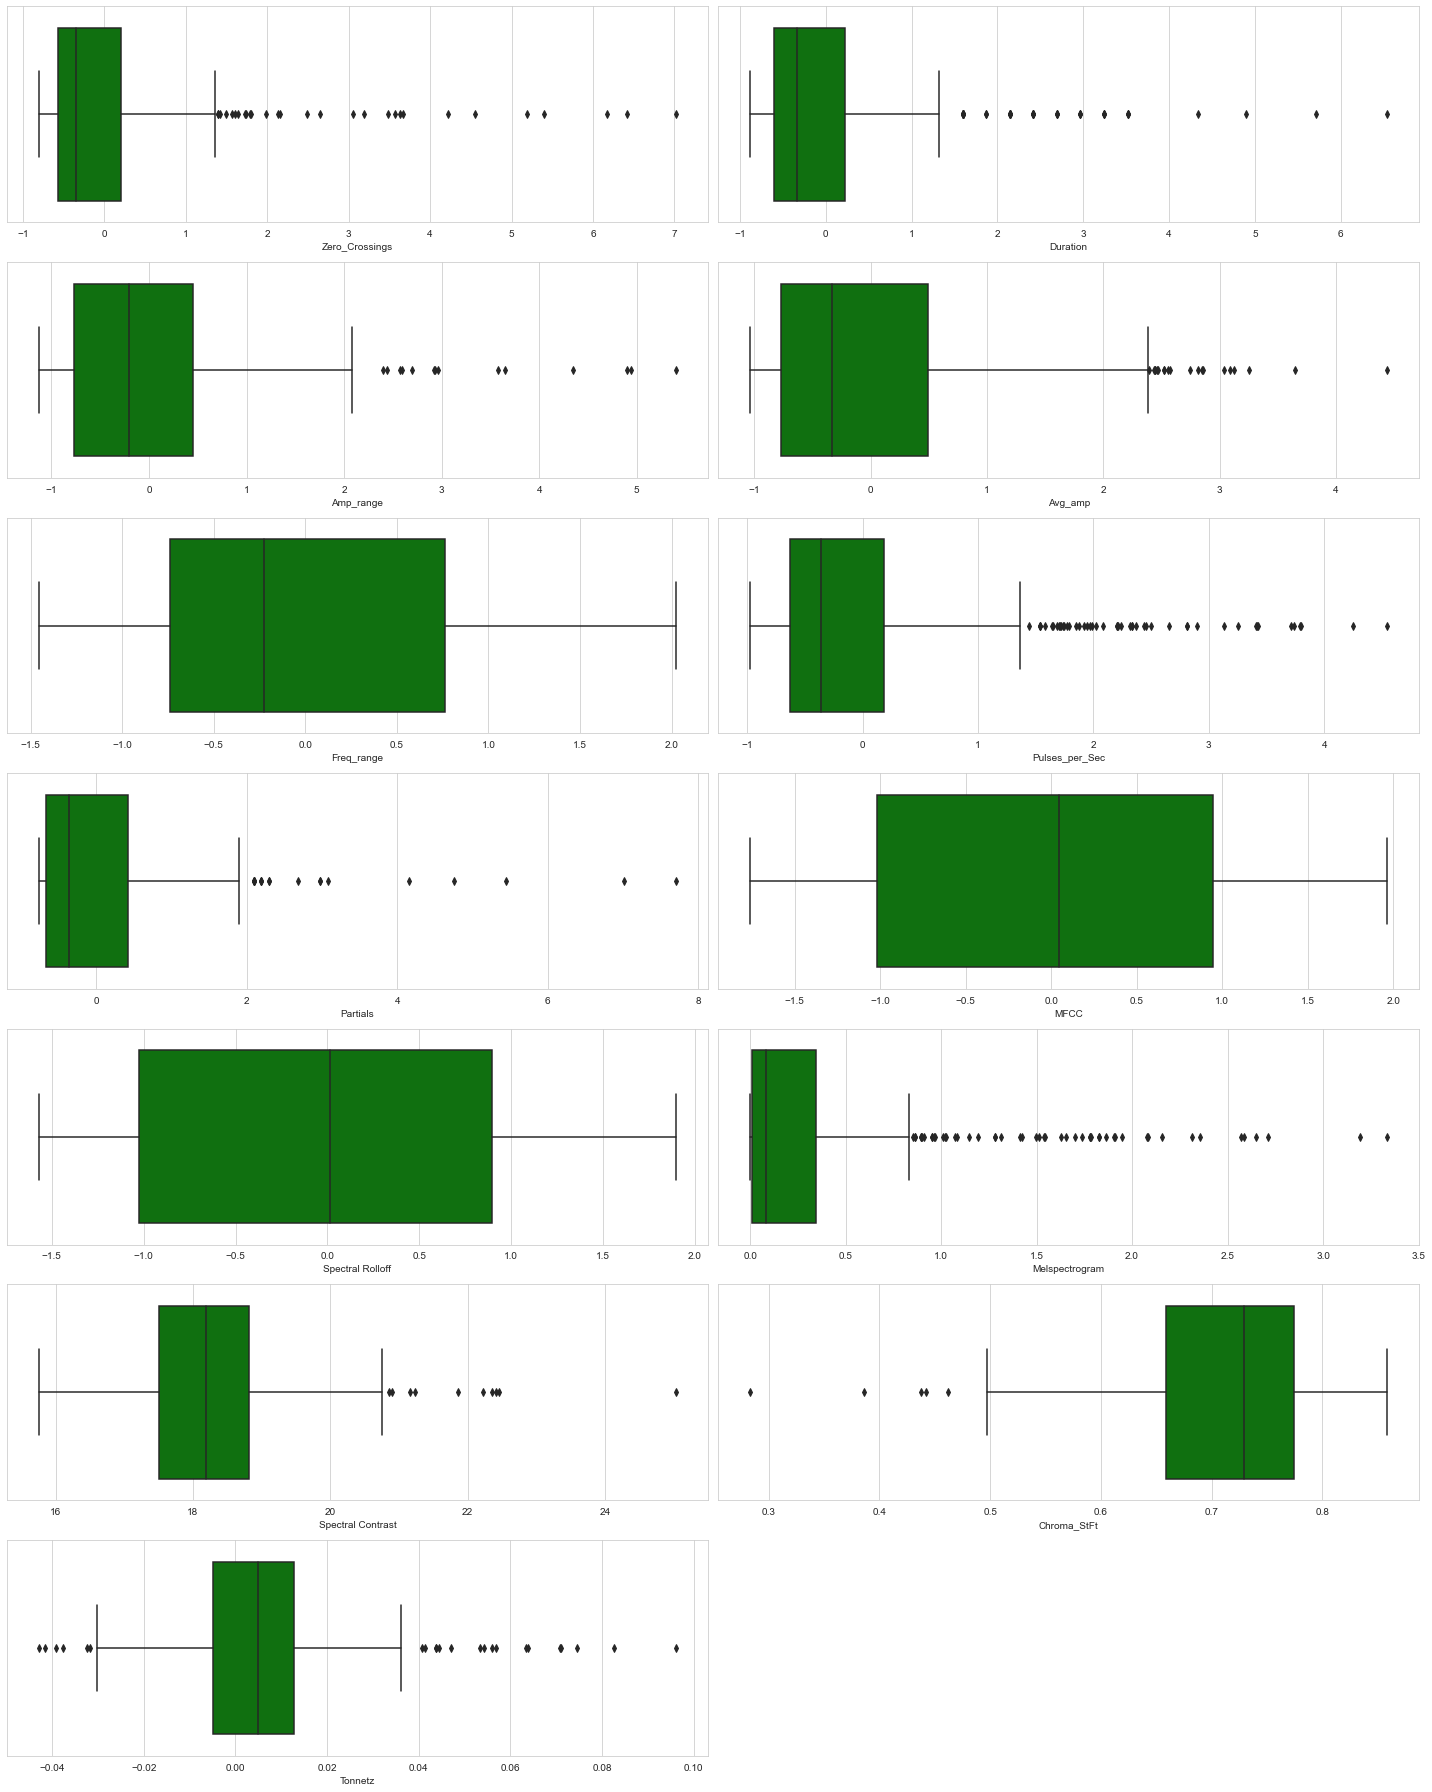

In [28]:
#Boxplot to check for outliers
l= ['Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp', 'Freq_range',
       'Pulses_per_Sec', 'Partials', 'MFCC', 'Spectral Rolloff',
       'Melspectrogram', 'Spectral Contrast', 'Chroma_StFt', 'Tonnetz']

plt.figure(figsize=(20,25))

for i in range(0,len(l)):
    plt.subplot(7,2,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='h')
    plt.tight_layout()
plt.show()    

<AxesSubplot:>

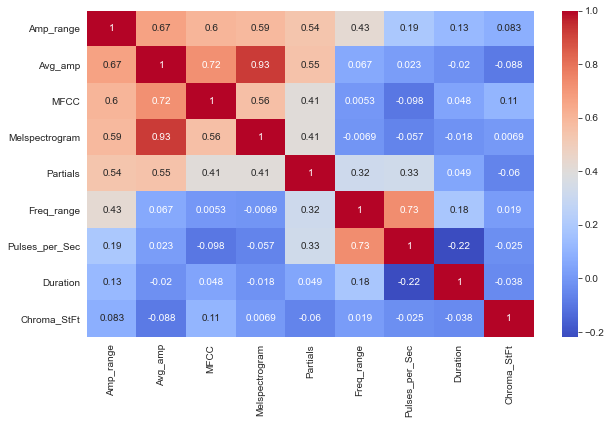

In [10]:
#Quality correlation matrix
k = 9 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Amp_range')['Amp_range'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'coolwarm')

In [11]:
df['Call'].value_counts()

growl                          208
hiss                            54
main call                       46
call                            21
growl?                          21
call?                           18
single call?                    14
purr                             7
mew?                             7
unknown                          6
roar                             5
Hiss                             4
roar?                            4
call sequence                    4
growl/hiss                       4
call/growl                       4
purr sequence                    4
Growl                            3
hiss                             3
mew                              2
call sequence?                   2
roar or call                     2
grow/hiss                        2
growl                            1
hiss?                            1
Sharp Hiss                       1
Loud rumble/roar                 1
Call sequence(possible mew)      1
Name: Call, dtype: i

In [12]:
df['Species'].value_counts()

Ocelot            113
L. lynx            81
L. serval          64
Domestic Cat       58
A. jubatus         53
Wildcat            47
Caracal Carcal     30
Bobcat             10
C. temminckii       7
Name: Species, dtype: int64

## Data Cleansing

In [13]:
df['Call'].unique()

array(['growl', nan, 'growl?', 'hiss', 'hiss?', 'call', 'unknown',
       'growl/hiss', 'call sequence', 'purr', 'purr sequence', 'Growl',
       'Hiss', 'Loud rumble/roar', 'Sharp Hiss', 'call?', 'roar',
       'roar or call', 'growl ', 'roar?', 'main call', 'call/growl',
       'Call sequence(possible mew)', 'mew', 'hiss ', 'call sequence?',
       'single call?', 'mew?', 'grow/hiss'], dtype=object)

In [14]:
clean = {'unknown':np.NaN, 'growl?': 'growl','Growl':'growl', 'growl ':'growl', 'hiss?':'hiss', 'Hiss':'hiss', 
         'Sharp Hiss':'hiss', 'purr sequence': 'purr', 'Loud rumble/roar':'roar', 'call?':'call', 'main call':'call', 
         'call sequence':'call', 'roar or call':'roar', 'roar?':'roar', 'purr sequence':'purr', ' roar':'roar', 'hiss ':'hiss', 
         'mew?':'mew', 'Call sequence(possible mew)':'call', 'call sequence?':'call', 'single call?':'call', 
         'grow/hiss':'growl/hiss'}
df.replace(clean, inplace = True)
df['Call'].unique()

array(['growl', nan, 'hiss', 'call', 'growl/hiss', 'purr', 'roar',
       'call/growl', 'mew'], dtype=object)

In [15]:
df['Age'].unique()

array(['A', 'Adult', 'Adult ', 'Juvenile ', 'juvenile', nan, 'Juvenile'],
      dtype=object)

In [16]:
clean2 = {'A':'Adult','Adult ':'Adult', 'Juvenile ':'Juvenile', 'juvenile':'Juvenile'}

df.replace(clean2, inplace = True)
df['Age'].fillna('Unknown', inplace = True)
df['Age'].unique()

array(['Adult', 'Juvenile', 'Unknown'], dtype=object)

In [17]:
df['Sex'].unique()

array([nan, 'G (1 M and 2F)', 'P', 'F', 'Pair (Unknown)', 'Female ',
       'Male', 'male ', 'G', 'Female', 'M', 'Unknown'], dtype=object)

In [18]:
clean3 = {'Female ':'Female','F':'Female', 'M':'Male','male ':'Male', 'P':'Pair', 'Pair (Unknown)':'Pair', 'G':'Group', 'G (1 M and 2F)':'Group'}

df.replace(clean3, inplace = True)
df['Sex'].fillna('Unknown', inplace = True)
df['Sex'].unique()

array(['Unknown', 'Group', 'Pair', 'Female', 'Male'], dtype=object)

In [19]:
df.describe(include='object')

,Sex,Age,Species,Call
count,463,463,463,444
unique,5,3,9,8
top,Male,Adult,Ocelot,growl
freq,201,350,113,233


## Standardize Continuous Features

In [20]:
continuous = ['Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp', 'Freq_range',
       'Pulses_per_Sec', 'Partials', 'MFCC', 'Spectral Rolloff']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [21]:
df.describe(include='float64')

,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Partials,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chroma_StFt,Tonnetz
count,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,463.000000,463.000000,463.000000,463.000000
mean,2.565742e-17,-7.307569e-17,-3.445768e-16,1.390776e-17,-2.397890e-18,-1.230118e-16,-5.730957e-17,-1.635361e-16,7.001839e-17,0.304937,18.261619,0.712314,0.005680
std,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,0.533002,1.148588,0.084442,0.017060
min,-8.017399e-01,-8.785390e-01,-1.127248e+00,-1.034684e+00,-1.454979e+00,-9.744958e-01,-7.609606e-01,-1.760406e+00,-1.569534e+00,0.000100,15.759882,0.283377,-0.042874
25%,-5.631104e-01,-6.038843e-01,-7.720782e-01,-7.674764e-01,-7.382224e-01,-6.296387e-01,-6.625733e-01,-1.020564e+00,-1.027714e+00,0.010136,17.509332,0.658461,-0.004810
50%,-3.480056e-01,-3.292297e-01,-2.023419e-01,-3.303311e-01,-2.238547e-01,-3.595963e-01,-3.674116e-01,4.744579e-02,1.505982e-02,0.080529,18.188795,0.729124,0.004978
75%,2.078834e-01,2.200797e-01,4.472710e-01,4.931236e-01,7.641944e-01,1.859322e-01,4.196864e-01,9.439250e-01,8.940823e-01,0.342521,18.815942,0.774701,0.012813
max,7.016261e+00,6.537137e+00,5.399800e+00,4.440119e+00,2.023404e+00,4.544467e+00,7.700343e+00,1.963261e+00,1.896611e+00,3.334678,25.029616,0.858282,0.096122


In [22]:
#Save new clean data to new CSV
df.to_csv('features_cleaned.csv', index=False)